In [1]:
import cv2
import boto3
import io
import numpy as np
from PIL import Image
import json
import matplotlib.pyplot as plt
# import tensorflow as tf

In [2]:
s3 = boto3.resource('s3')
bucket = s3.Bucket('final-year-project-gb15')
object = bucket.Object('002_5.JPG')
response = object.get()
stream = io.BytesIO(response['Body'].read())
image = Image.open(stream)

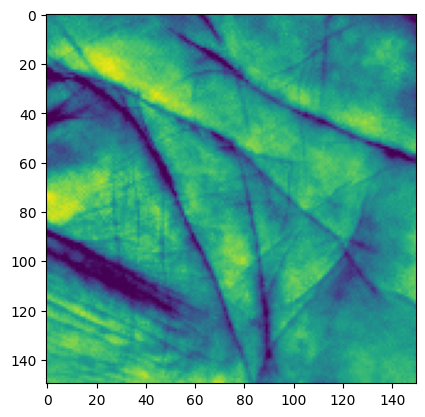

In [3]:
np_image = np.array(image)
np_image = np.array(np_image.astype('float32')/255.0)
gray = cv2.cvtColor(np_image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [5]:
model = tf.keras.models.load_model('./0000001')

In [4]:
image = gray.reshape(-1,150,150,1)

In [7]:
model.predict(image)

1/1 [==============================] - 0s 135ms/step


array([[1.7580825 , 0.        , 0.        , 1.1915947 , 1.1340399 ,
        0.        , 0.        , 3.0464418 , 1.8440828 , 0.        ,
        3.2947917 , 0.        , 0.        , 0.        , 0.24794324,
        2.1729407 , 0.7849016 , 3.2897997 , 4.498726  , 1.5825617 ,
        0.        , 0.        , 0.        , 1.6821145 , 0.        ,
        0.        , 0.9526556 , 1.7349743 , 2.465243  , 0.        ,
        3.2557213 , 0.19743745]], dtype=float32)

In [6]:
import requests

In [10]:
url = 'http://ec2-35-154-198-119.ap-south-1.compute.amazonaws.com:8080/predict'

In [11]:
data = json.dumps({'image': image.tolist()})
headers = {'content-type': 'application/json'}
r = requests.post(url, data=data, headers=headers)

In [13]:
r.text

'{"prediction": [[1.7580825090408325, 0.0, 0.0, 1.1915947198867798, 1.1340398788452148, 0.0, 0.0, 3.0464417934417725, 1.8440828323364258, 0.0, 3.2947916984558105, 0.0, 0.0, 0.0, 0.2479432374238968, 2.172940731048584, 0.7849016189575195, 3.289799690246582, 4.498725891113281, 1.582561731338501, 0.0, 0.0, 0.0, 1.6821144819259644, 0.0, 0.0, 0.9526556134223938, 1.7349742650985718, 2.465243101119995, 0.0, 3.2557213306427, 0.19743745028972626]]}'